In [2]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ensembl_vs_tgs	results/compare/sqanti3/ensembl_vs_tgs/query_classification.txt
1658


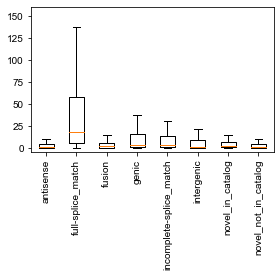

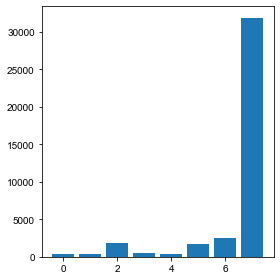

tgs_vs_ngs	results/compare/sqanti3/tgs_vs_ngs/query_classification.txt
8653


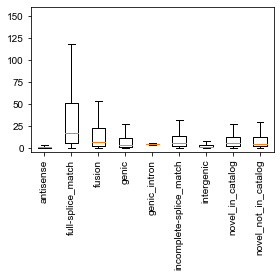

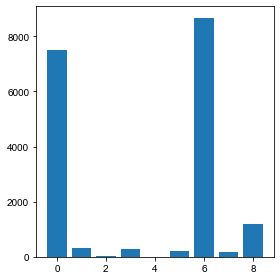

ensembl_vs_ncbi	results/compare/sqanti3/ensembl_vs_ncbi/query_classification.txt
1291


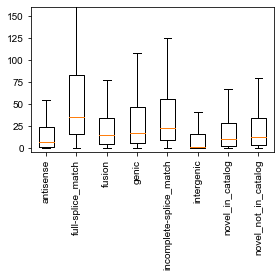

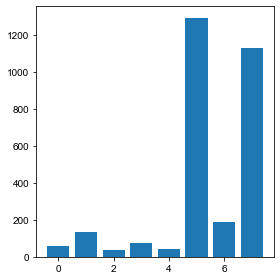

ncbi_vs_ngs	results/compare/sqanti3/ncbi_vs_ngs/query_classification.txt
8005


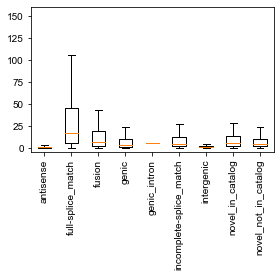

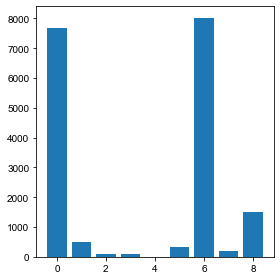

ensembl_vs_ngs	results/compare/sqanti3/ensembl_vs_ngs/query_classification.txt
8178


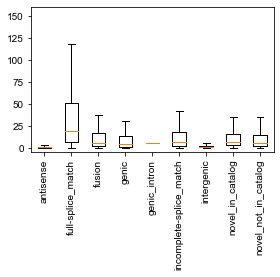

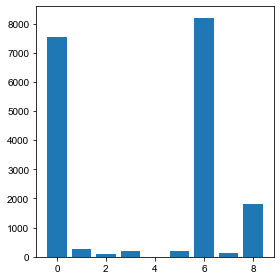

ngs_vs_ncbi	results/compare/sqanti3/ngs_vs_ncbi/query_classification.txt
1389


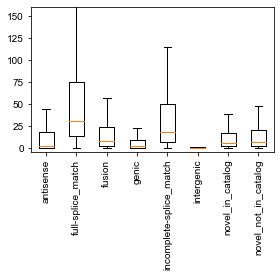

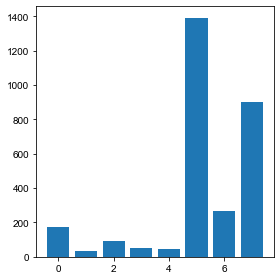

ncbi_vs_tgs	results/compare/sqanti3/ncbi_vs_tgs/query_classification.txt
1324


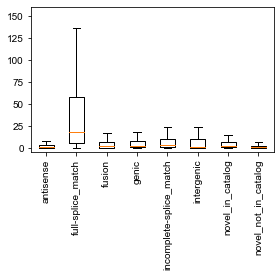

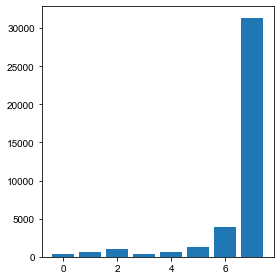

tgs_vs_ncbi	results/compare/sqanti3/tgs_vs_ncbi/query_classification.txt
1886


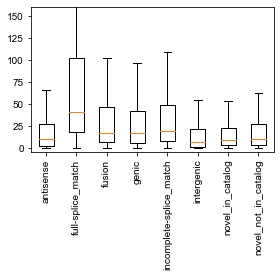

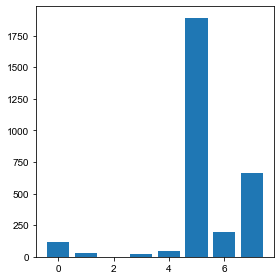

ngs_vs_tgs	results/compare/sqanti3/ngs_vs_tgs/query_classification.txt
758


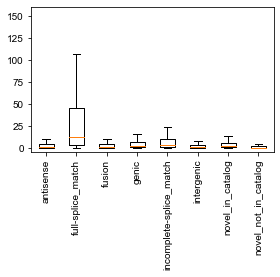

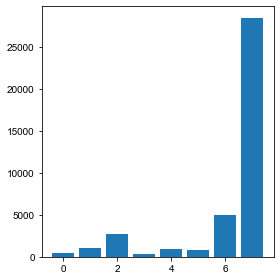

ncbi_vs_ensembl	results/compare/sqanti3/ncbi_vs_ensembl/query_classification.txt
665


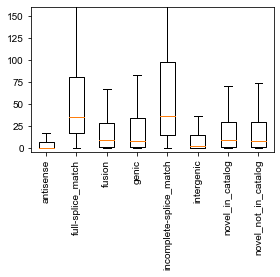

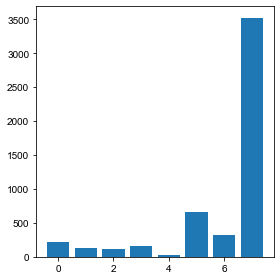

tgs_vs_ensembl	results/compare/sqanti3/tgs_vs_ensembl/query_classification.txt
1781


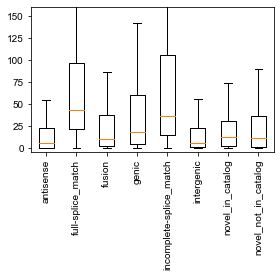

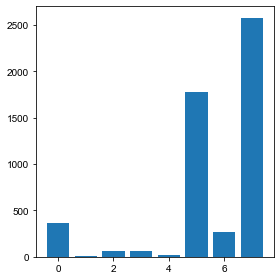

ngs_vs_ensembl	results/compare/sqanti3/ngs_vs_ensembl/query_classification.txt
746


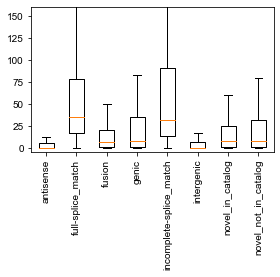

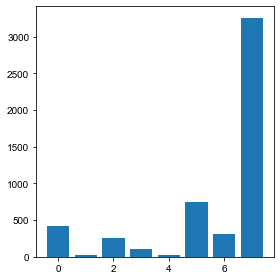

In [114]:
for path in glob.glob("results/compare/sqanti3/*/query_classification.txt"):
    pair = path.split("/")[-2]
    name2 = pair.split("_vs_")[1]
    if name2 == "ngs":
        fpkms = pd.read_csv("../1_ngs/results/expression/stringtie/taco.transcript_fpkm.tsv", sep="\t", index_col=0)
    elif name2 == "tgs":
        fpkms = pd.read_csv("../2_tgs/results/expression/stringtie/cupcake.transcript_fpkm.tsv", sep="\t", index_col=0)
    elif name2 == "ncbi":
        fpkms = pd.read_csv("../1_ngs/results/expression/stringtie/ncbi.transcript_fpkm.tsv", sep="\t", index_col=0)
    elif name2 == "ensembl":
        fpkms = pd.read_csv("../1_ngs/results/expression/stringtie/ensembl.transcript_fpkm.tsv", sep="\t", index_col=0)
    else:
        continue
    print(pair, path, sep="\t")
    
    dat = pd.read_csv(path, sep="\t", index_col=0)
    
    names = []
    counts = []
    means = []
    stds = []
    array = []
    ns = [] # max fpkm < 0.5
    for sc, tmp in dat.groupby(by="structural_category"):
        d = fpkms.loc[tmp.index]
        names.append(sc)
        counts.append(len(tmp))
        m = d.values.flatten().mean()
        s = d.values.flatten().std()
        n = len(d[d.max(axis=1) < 0.5])
        ns.append(n)
        array.append(d.max(axis=1))
        
    print(ns[-3])
    
    xs = np.arange(len(names))
    plt.figure(figsize=(4, 4))
    plt.boxplot(array, positions=xs, showfliers=False)
    plt.ylim(-5, 160)
    plt.xticks(xs, names, rotation=90)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(4, 4))
    plt.bar(xs, ns)
    plt.tight_layout()
    plt.show()
    
    # break

In [3]:
fpkms = pd.read_csv("../2_tgs/results/expression/stringtie/cupcake.transcript_fpkm.tsv", sep="\t", index_col=0)

In [6]:
fpkms.loc["PB.468.1"].max()

12.143946000000001

In [7]:
fpkms.loc["PB.468.2"].max()

0.0

In [8]:
fpkms.loc["PB.468.3"].max()

71.650627

In [37]:
import gzip
import pandas as pd


In [9]:
fpkms1 = pd.read_csv("../1_ngs/results/expression/stringtie/taco.transcript_fpkm.tsv", sep="\t", index_col=0)
fpkms2 = pd.read_csv("../2_tgs/results/expression/stringtie/cupcake.transcript_fpkm.tsv", sep="\t", index_col=0)

In [11]:
sqanti = pd.read_csv("results/compare/sqanti3/tgs_vs_ngs/query_classification.txt", sep="\t", index_col=0)
sqanti.head()

,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,ref_exons,diff_to_TSS,...,perc_A_downstream_TTS,seq_A_downstream_TTS,dist_to_cage_peak,within_cage_peak,pos_cage_peak,dist_to_polya_site,within_polya_site,polyA_motif,polyA_dist,ORF_seq
isoform,,,,,,,,,,,,,,,,,,,,,
TU1,NW_019174257.1,-,7153,5,intergenic,novelGene_9,novel,NaN,NaN,NaN,...,30.0,CACATTTACTGAACCTGATG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTQRSSTLCDVPVRQKRKETCAQFRRFADGDRWRRAPGLGPCRLII...
TU10,NW_019174257.1,+,1157,5,intergenic,novelGene_15,novel,NaN,NaN,NaN,...,45.0,ATCCAGTAAAAGCTATATAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MADSLLTNKLCSASARGDLDGVKLLLQGGANVNGFNEFNRTALQVV...
TU100,NW_019174257.1,-,4889,56,novel_not_in_catalog,PB.15,novel,5230.0,14.0,NaN,...,40.0,ATGAAACTGAGTCATGCGAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MGIKGQKGAKGESGTRGTVSTPGKMGFIGSPGGKGRPGPAGPPGLP...
TU1000,NW_019174257.1,-,6214,19,full-splice_match,PB.210,PB.210.1,5864.0,19.0,-368.0,...,25.0,AGGGGATGAGCAGCGTCCAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MDSSDMDANYGGGLLDMVKGGAGKFFSNFKDNLKDTLKDTSTKVMH...
TU1001,NW_019174257.1,-,5916,18,incomplete-splice_match,PB.210,PB.210.19,5470.0,19.0,115.0,...,25.0,AGGGGATGAGCAGCGTCCAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MSLLGAYKKKTSYDGYESLQLVDSGGDSFSIGRGSSGGGSSSTLGG...


In [35]:
ngs = fpkms1[fpkms1.max(axis=1) > 0.5].index.values
print(len(ngs), len(fpkms1), sep="\t")
intergenic = sqanti[sqanti["structural_category"] == "intergenic"].index.values
print(len(intergenic), len(sqanti), sep="\t")
ngs = set(ngs) & set(intergenic)
print(len(ngs))

87867	106264
37655	106264
29002


In [45]:
tgs = fpkms2[fpkms2.max(axis=1) >= 0].index.values
len(tgs), len(fpkms2)

(124125, 124125)

In [44]:

with gzip.open("../1_ngs/results/assembly/taco/stringtie.gtf.gz", "rt") as f:
    for line in f:
        row = line.strip("\n").split("\t")
        attris = dict()
        for item in row[-1].split(";"):
            item = item.strip()
            if item == "":
                continue
            k, v = item.split(" ")
            attris[k.strip()] = v.strip()[1:-1]
        print(attris)
        tid = attris["transcript_id"]
        print(line)
        break

{'tss_id': 'TSS15', 'locus_id': 'L1', 'transcript_id': 'TU16', 'gene_id': 'G11'}
NW_019174257.1	taco	exon	2255	2355	1000	+	.	tss_id "TSS15"; locus_id "L1"; transcript_id "TU16"; gene_id "G11";



In [46]:
sqanti.loc["TU2235"]

chrom                                                       NW_019174258.1
strand                                                                   -
length                                                                2714
exons                                                                   11
structural_category                                              antisense
associated_gene                                        novelGene_PB.458_AS
associated_transcript                                                novel
ref_length                                                             NaN
ref_exons                                                              NaN
diff_to_TSS                                                            NaN
diff_to_TTS                                                            NaN
diff_to_gene_TSS                                                       NaN
diff_to_gene_TTS                                                       NaN
subcategory              

In [48]:
import gzip
from collections import defaultdict
import pysam

In [52]:
data = defaultdict(list)
with gzip.open("results/function/isoforms/all.gtf.gz", "rt") as f:
    for line in f:
        row = line.strip("\n").split("\t")
        if row[2] != "exon":
            continue
        attris = dict()
        for item in row[-1].split(";"):
            item = item.strip()
            if item == "":
                continue
            k, v = item.split()
            attris[k.strip()] = v.strip()[1:-1]
            print(item)
        print(attris)
        chrom, start, end, strand = 
        print(row)
        break

transcript_id "PB.1.1"
gene_id "PB.1"
{'transcript_id': 'PB.1.1', 'gene_id': 'PB.1'}
['NW_019174257.1', 'PacBio', 'exon', '2236', '2355', '.', '+', '.', 'transcript_id "PB.1.1"; gene_id "PB.1";']


In [40]:
import pandas as pd
import re
from Bio import SeqIO

In [2]:
dat = pd.read_csv("results/function/diamond/nr.modified.tsv", sep="\t")

In [26]:
isoforms = []
for iden in dat["ID"]:
    r = re.search("^lcl\|ORF[0-9]+\_", iden)
    assert r is not None
    i1, i2 = r.span()
    tid = iden[i2:].split(":")[0]
    isoforms.append(tid)

In [27]:
dat["Isoform"] = isoforms

In [28]:
dat

,ID,Subject,PercIdent,ORF_Length,Mismatch,GapOpen,Query_Start,Query_End,Subject_Start,Subject_End,Evalue,BitScore,Isoform
0,lcl|ORF1_PB.1.1:45:2816,XP_022593583.1,100.0,923,0,0,0,923,0,923,1.600000e-295,1026.2,PB.1.1
1,lcl|ORF1_PB.1.1:45:2816,XP_023254322.1,83.2,923,149,2,0,923,0,917,7.700000e-279,970.7,PB.1.1
2,lcl|ORF1_PB.1.1:45:2816,XP_039984357.1,69.0,927,278,6,0,923,0,922,1.200000e-210,744.2,PB.1.1
3,lcl|ORF1_PB.1.1:45:2816,XP_018528873.1,68.4,929,270,7,0,923,0,911,2.900000e-201,713.0,PB.1.1
4,lcl|ORF1_PB.1.1:45:2816,XP_039984358.1,68.4,902,276,6,25,923,11,908,8.800000e-198,701.4,PB.1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900106,lcl|ORF1_TU106248:480:851,XP_029506561.1,66.7,114,37,1,11,124,0,114,2.200000e-35,159.1,TU106248
7900107,lcl|ORF1_TU106248:480:851,XP_038848488.1,69.9,113,33,1,11,124,0,112,2.200000e-35,159.1,TU106248
7900108,lcl|ORF1_TU106248:480:851,XP_021439425.2,66.7,114,37,1,11,124,0,114,2.200000e-35,159.1,TU106248
7900109,lcl|ORF1_TU106248:480:851,XP_031645869.1,66.7,114,37,1,11,124,0,114,2.200000e-35,159.1,TU106248


In [29]:
dat1 = dat[dat["Evalue"] <= 1e-6]

In [30]:
len(dat1)

7781042

In [31]:
rows = []
for tid, tmp in dat1.groupby("Isoform"):
    tmp = tmp.sort_values(by="Evalue")
    rows.append(tmp.iloc[0])

In [32]:
len(rows)

188672

In [25]:
for iden in dat1["ID"]:
    r = re.search("^lcl\|ORF[0-9]+\_", iden)
    assert r is not None
    i1, i2 = r.span()
    tid = iden[i2:].split(":")[0]
    print(iden, re.search("^lcl\|ORF[0-9]+_", iden), tid, sep="\t")
    break

lcl|ORF1_PB.1.1:45:2816	<_sre.SRE_Match object; span=(0, 9), match='lcl|ORF1_'>	PB.1.1


In [36]:
dat2 = pd.DataFrame(rows)
dat2

,ID,Subject,PercIdent,ORF_Length,Mismatch,GapOpen,Query_Start,Query_End,Subject_Start,Subject_End,Evalue,BitScore,Isoform
0,lcl|ORF1_PB.1.1:45:2816,XP_022593583.1,100.0,923,0,0,0,923,0,923,1.600000e-295,1026.2,PB.1.1
25,lcl|ORF1_PB.1.2:45:2816,XP_022593583.1,100.0,923,0,0,0,923,0,923,1.600000e-295,1026.2,PB.1.2
5647,lcl|ORF3_PB.10.1:1608:1988,XP_023257687.1,93.7,95,6,0,11,106,90,185,2.600000e-44,188.7,PB.10.1
5763,lcl|ORF14_PB.10.2:134:1237,XP_022614136.1,100.0,367,0,0,0,367,0,367,1.500000e-220,775.8,PB.10.2
42108,lcl|ORF35_PB.100.1:3296:4768,XP_023255587.1,97.3,483,12,1,7,490,17,499,1.800000e-266,928.7,PB.100.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7594130,lcl|ORF18_TU99990:1882:2895,XP_023261396.1,84.7,300,29,1,23,323,290,573,1.600000e-109,406.8,TU99990
7594103,lcl|ORF16_TU99991:1882:2856,XP_023261396.1,84.7,300,29,1,23,323,290,573,9.200000e-110,407.5,TU99991
7594234,lcl|ORF4_TU99992:804:1817,XP_023261396.1,84.7,300,29,1,23,323,290,573,1.600000e-109,406.8,TU99992
7594099,lcl|ORF3_TU99994:121:411,TNN72598.1,60.9,64,24,1,31,94,14,78,3.300000e-07,65.1,TU99994


In [38]:
idens = set(dat2["ID"])

In [39]:
len(idens)

188672

In [45]:
with open("out.fasta", "w+") as fw:
    for record in SeqIO.parse("results/function/orffinder/orf.fasta", "fasta"):
        # iden = record.id
        if record.id in idens:
            SeqIO.write(record, fw, "fasta")
        # break